In [1]:
import numpy as np
import matplotlib.pyplot as plt
import backbone.Distributions as dist
import importlib
import numpy as np
from astroML.plotting import hist
import backbone.AstroMLmod as AstroMLmod
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import random
random.seed(42)
import math
import time as time
import pandas as pd
importlib.reload(dist)
plt.rcParams.update({'font.size': 20}) 
from sklearn.utils import check_random_state
rng = check_random_state(42)

C:\Users\koket\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\astroML\linear_model\linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


# Gaussian Zoo generator

## The behavior of the correlation function as we increase the sparseness of gaussians

0
99
Chi-Square score:  32223.695682425725
L2 Norm score:  (np.float64(0.7400268456629131), np.float64(0.07783434114380697))
0
99
Chi-Square score:  393.7552141478406
L2 Norm score:  (np.float64(0.2320640683340852), np.float64(0.05777663043236718))
0
99
Chi-Square score:  70.84336376106685
L2 Norm score:  (np.float64(0.060557346652214336), np.float64(0.01613751981962296))
0
99
Chi-Square score:  8.829958838370414
L2 Norm score:  (np.float64(0.014628526669642258), np.float64(0.00777296842787092))
0
99
Chi-Square score:  1.3557842528687032
L2 Norm score:  (np.float64(0.008836274562143502), np.float64(0.01056677527126807))
0
99
Chi-Square score:  0.6100304113031112
L2 Norm score:  (np.float64(0.0008862239873445087), np.float64(0.003774630270413648))


<Figure size 1920x1440 with 0 Axes>

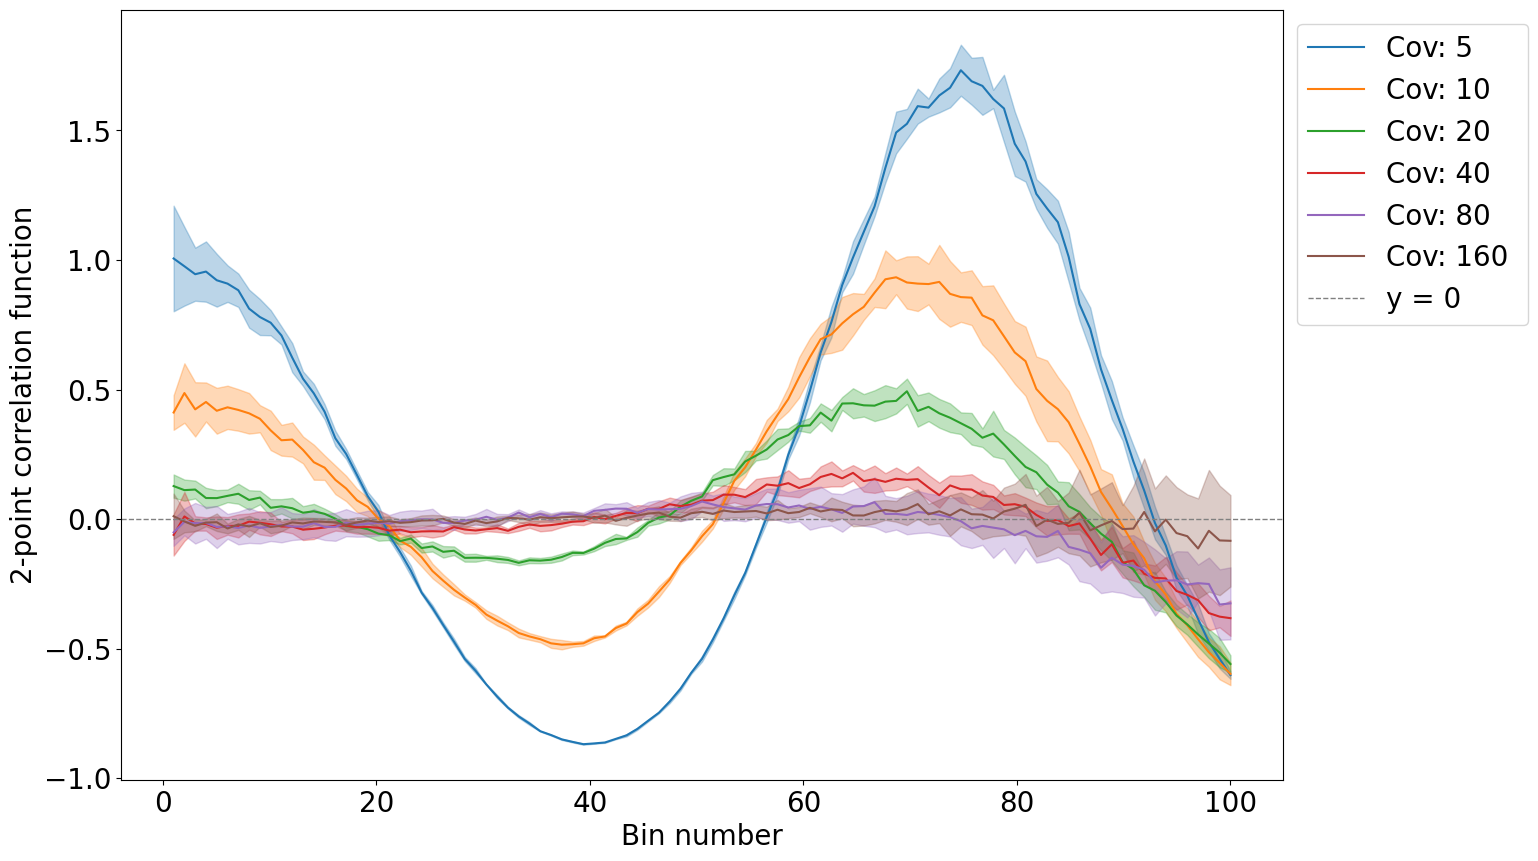

In [66]:
importlib.reload(dist)

importlib.reload(dist)
importlib.reload(AstroMLmod)

fig = plt.figure(dpi = 300)
plt.style.use("default")
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20})


cov_range = []
times_array = []
chi_scores = []
norm_scores = []

dimensions = 2  
mean_range = (-50, 50)
cov_range = (-10, 10)  
num_samples = 2 
points_per_gaussian = 2000
n_points = points_per_gaussian*num_samples
structure = []
a = 100
b = 100
structure = []

for cov_range in [(5, 5),(10, 10),(20,20),(40,40),(80,80),(160,160)]:
    
    means,covariances = dist.sample_means_and_covariances(dimensions, mean_range, cov_range, num_samples, seed = 7)
    
    covariances = [[[cov_range[0],0],[0,cov_range[0]]],[[cov_range[0],0],[0,cov_range[0]]]]
    #Creating a feature space samples from Gaussians
    
    gaussian_space = dist.generate_gaussian_points(means[0]/2,covariances[0],points_per_gaussian)
    for mean,covariance in zip(means[1:],covariances[1:]):
        
        gaussian_space = np.concatenate((gaussian_space,dist.generate_gaussian_points(mean, covariance,points_per_gaussian)),axis = 0)
    gaussian_space = gaussian_space/max(np.max(gaussian_space),abs(np.min(gaussian_space)))
    #dist.scatter_points(gaussian_space, alpha = 0.10)

    #dist.scatter_points(data_R, alpha = 0.10)

    timer = time.time()
    corr, dcorr, ChiScore,NormScore = AstroMLmod.correlate_and_plot(gaussian_space, max_dist = 0.7, plot = False, return_corr = True)
    bins = np.linspace(0, 100, 100)
    chi_scores.append(ChiScore)
    norm_scores.append(NormScore)
    
    line, = plt.plot(bins[1:],corr,
                     label = "Cov: "+ str(cov_range[0])+" ")
    plt.fill_between(bins[1:],corr- dcorr, corr+dcorr, color = line.get_color(),alpha = .3)
plt.axhline(0, color='gray', linestyle='--', linewidth=1,label = "y = 0") 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel("2-point correlation function")
plt.xlabel("Bin number")
plt.show()

# Plotting the  structure content

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1920x1440 with 0 Axes>

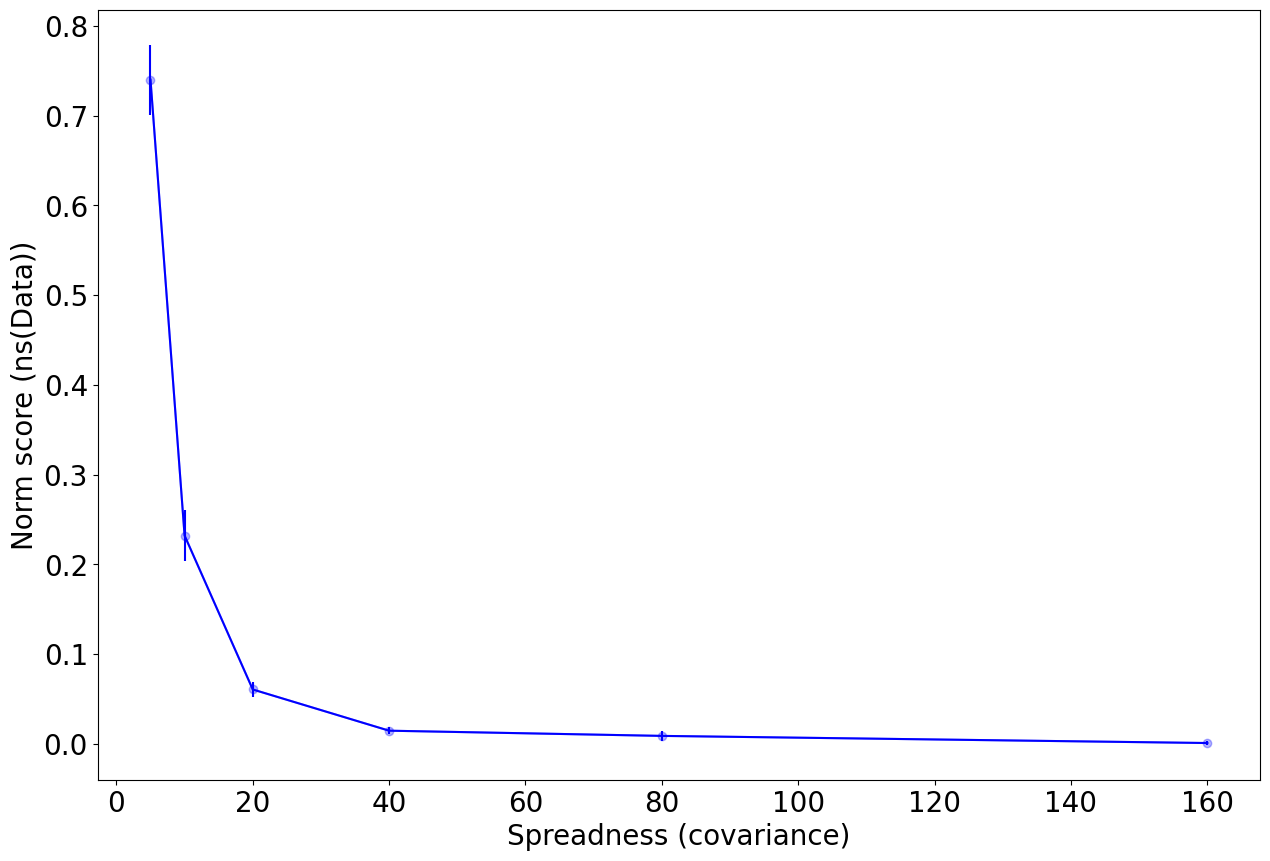

In [64]:
fig = plt.figure(dpi = 300)
plt.style.use("default")
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20}) 
cov_ranges = [5,10,20,40,80,160]
x = cov_ranges
yerr = np.array([b/2 for a,b in norm_scores])
y = np.array([a for a,b in  norm_scores])

plt.plot(x, y,color = "blue",marker = "o",alpha = 0.3)

plt.errorbar(x, y, yerr = yerr, color = "blue",alpha = 1)
#plt.errorbar(x2, y2, yerr=yerr2, c = "blue")
plt.ylabel("Norm score (ns(Data))",fontsize = 20)
plt.xlabel("Spreadness (covariance)",fontsize = 20)
plt.show

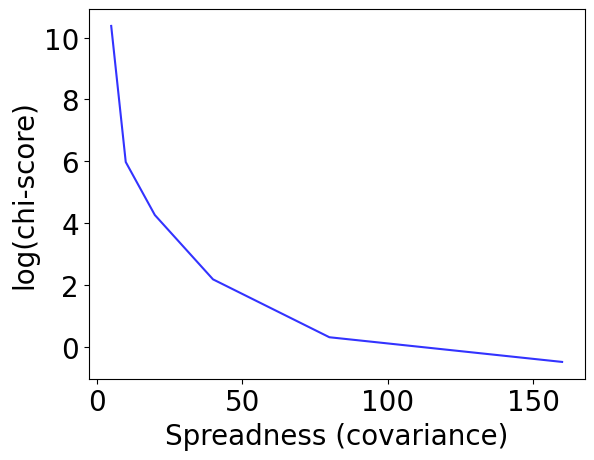

In [65]:
plt.plot(x, np.log(chi_scores),color = "blue",marker = "o",alpha = .8)
#plt.errorbar(x2, y2, yerr=yerr2, c = "blue")
plt.ylabel("log(chi-score)",fontsize = 20)
plt.xlabel("Spreadness (covariance)",fontsize = 20)
#plt.xticks(x)
plt.show()

# Gaussian Zoo generator

## The behavior of the correlation function as we increase the distances between gaussians

0
99
Chi-Square score:  201735.50178829965
L2 Norm score:  (np.float64(1.1293761056170373), np.float64(0.102813373230634))
0
99
Chi-Square score:  5770.0394854880105
L2 Norm score:  (np.float64(0.614394246173887), np.float64(0.10465554165356221))
0
99
Chi-Square score:  828.3046215187893
L2 Norm score:  (np.float64(0.23995204177966892), np.float64(0.03483016247623817))
0
99
Chi-Square score:  91.66392899350011
L2 Norm score:  (np.float64(0.043922776271915126), np.float64(0.012919697798962428))
0
99
Chi-Square score:  1.151862859706905
L2 Norm score:  (np.float64(0.00868852178432611), np.float64(0.010949259755317972))
0
99
Chi-Square score:  0.5803342734255019
L2 Norm score:  (np.float64(0.0005092625109075065), np.float64(0.0030421763443913355))


<Figure size 1920x1440 with 0 Axes>

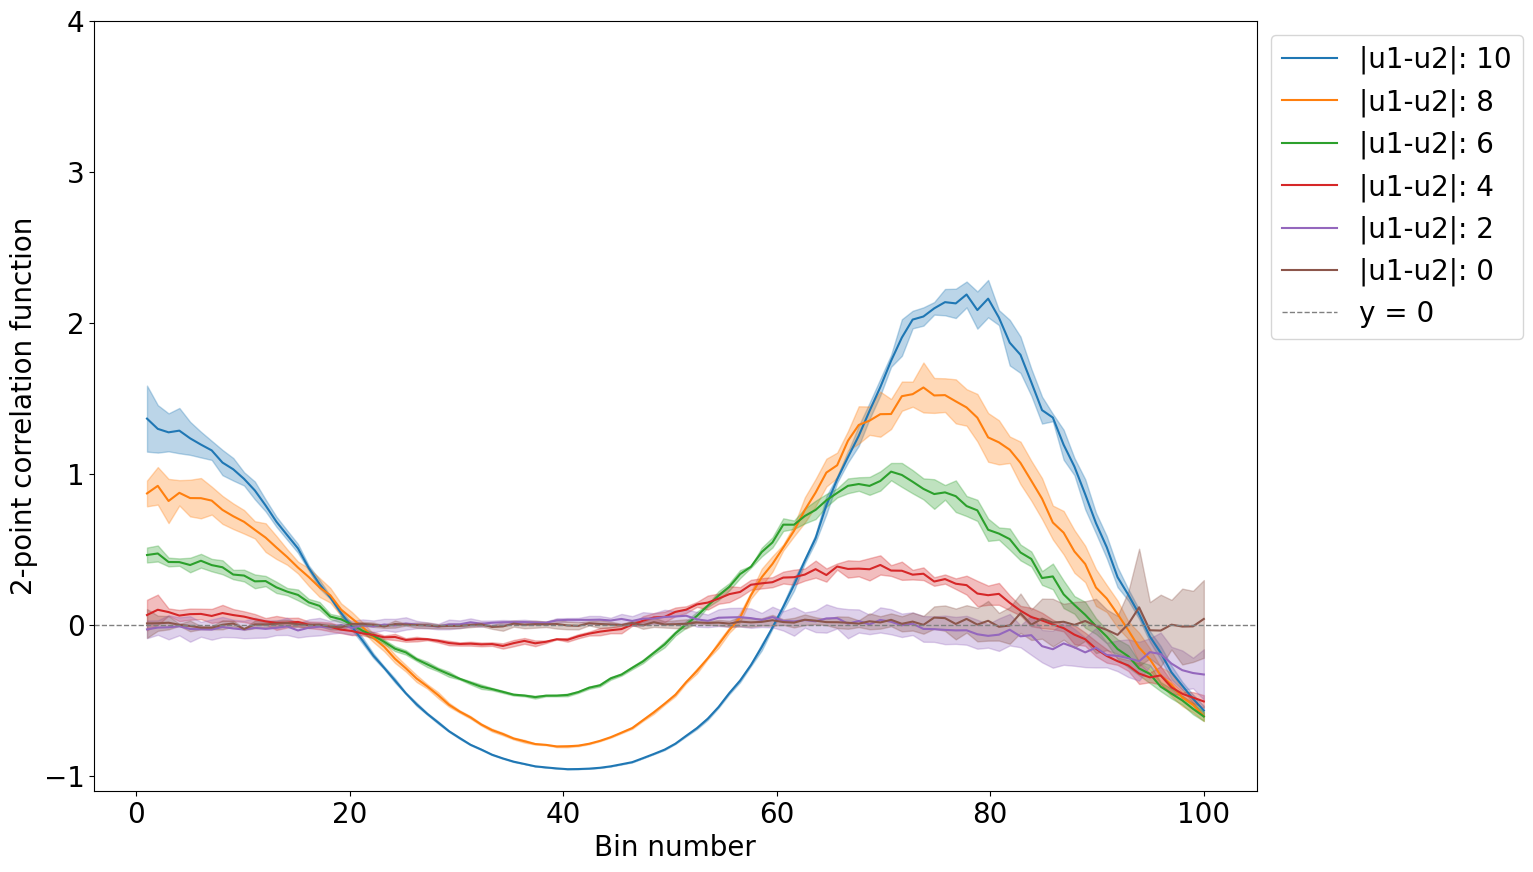

In [53]:
importlib.reload(dist)
importlib.reload(dist)
importlib.reload(AstroMLmod)

fig = plt.figure(dpi = 300)
plt.style.use("default")
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20})


cov_range = []
times_array = []
chi_scores = []
norm_scores = []


dimensions = 2  
mean_range = (-50, 50)
cov_range = (-10, 10)  
num_samples = 2 
points_per_gaussian = 2000
n_points = points_per_gaussian*num_samples
structure = []
a = 100
b = 100


cov_range  = [5]

for separation in [10,8,6,4,2,0]:
    means = [[separation,0],[-separation,0]]
    
    covariances = [[[cov_range[0],0],[0,cov_range[0]]],[[cov_range[0],0],[0,cov_range[0]]]]
    #Creating a feature space samples from Gaussians
    
    gaussian_space = dist.generate_gaussian_points(means[0],covariances[0],points_per_gaussian)
    for mean,covariance in zip(means[1:],covariances[1:]):
        
        gaussian_space = np.concatenate((gaussian_space,dist.generate_gaussian_points(mean, covariance,points_per_gaussian)),axis = 0)
    gaussian_space = gaussian_space/max(np.max(gaussian_space),abs(np.min(gaussian_space)))
   # dist.scatter_points(gaussian_space, alpha = 0.2)

    #dist.scatter_points(data_R, alpha = 0.10)

    timer = time.time()
    corr, dcorr, ChiScore,NormScore = AstroMLmod.correlate_and_plot(gaussian_space, max_dist = 0.7, plot = False, return_corr = True)

    chi_scores.append(ChiScore)
    norm_scores.append(NormScore)
    bins = np.linspace(0, 100, 100)
    
    line, = plt.plot(bins[1:],corr,label = "|u1-u2|: "+ str(separation) 
                    )
    
    plt.fill_between(bins[1:],corr- dcorr, corr+dcorr, color = line.get_color(),alpha = .3)
plt.axhline(0, color='gray', linestyle='--', linewidth=1,label = "y = 0") 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(-1.1,4)
plt.ylabel("2-point correlation function")
plt.xlabel("Bin number")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1920x1440 with 0 Axes>

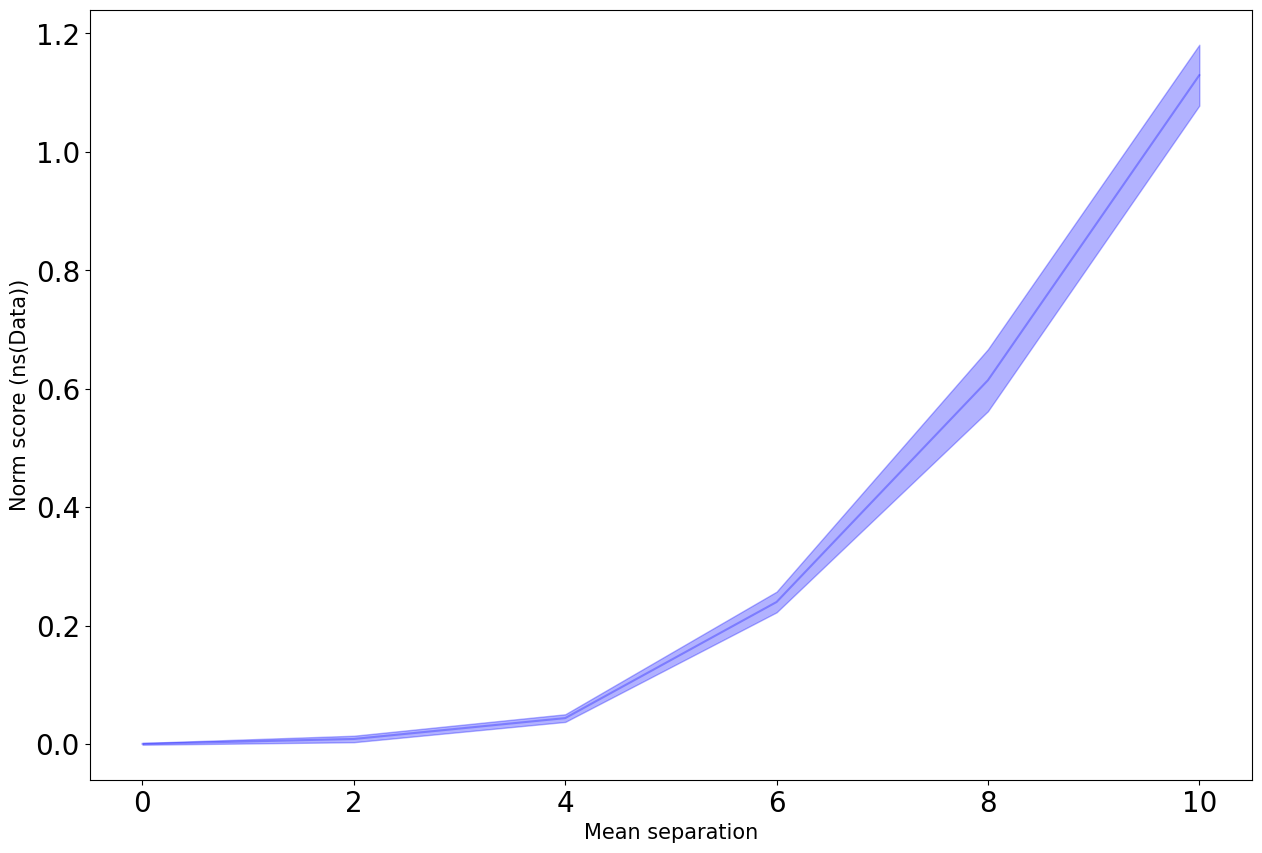

In [54]:
fig = plt.figure(dpi = 300)
plt.style.use("default")
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20}) 
separation =  [10,8,6,4,2,0]
x = separation
yerr = np.array([b/2 for a,b in norm_scores])
y = np.array([a for a,b in  norm_scores])

plt.plot(x, y,color = "blue",marker = "o",alpha = 0.3)

plt.errorbar(x, y, yerr = yerr, color = "blue",alpha = 1)
#plt.errorbar(x2, y2, yerr=yerr2, c = "blue")
plt.ylabel("Norm score (ns(Data))",fontsize = 20)
plt.xlabel("Spreadness (covariance)",fontsize = 20)
plt.show

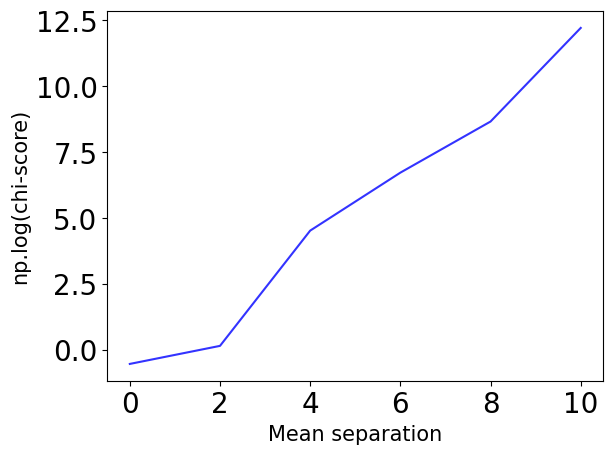

In [55]:
plt.plot(x, np.log(chi_scores),color = "blue",marker = "o",alpha = .8)
#plt.errorbar(x2, y2, yerr=yerr2, c = "blue")
plt.ylabel("log(chi-score)",fontsize = 20)
plt.xlabel("Mean separation",fontsize = 20)
plt.show()

In [171]:
print(len(bootstraps))
len(np.ma.masked_invalid(bootstraps.mean(0)))

10


99

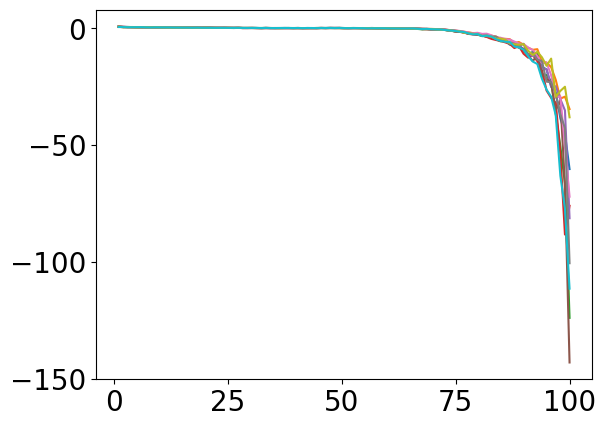

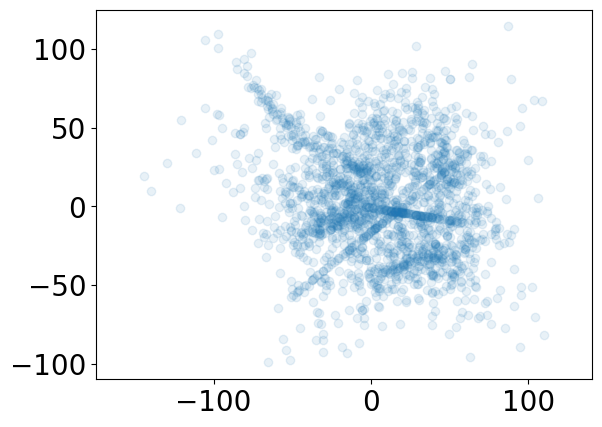

In [33]:
for bootstrap in bootstraps:
    plt.plot(bins[1:],bootstrap)
plt.show()
dist.scatter_points(gaussian_space, alpha = 0.10)

np.float64(0.4080251291283709)

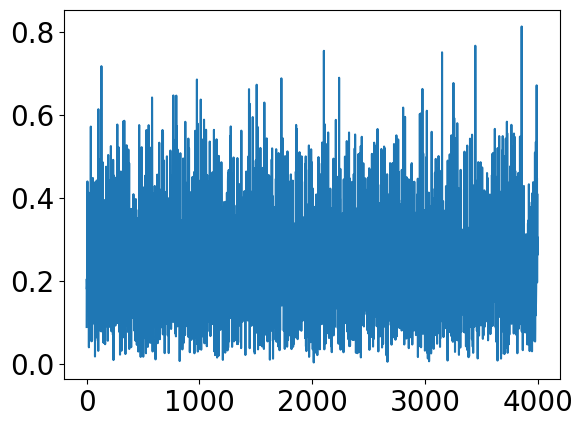

In [50]:
gaussian_space

mean = np.mean(gaussian_space,axis = 0)
distances = np.linalg.norm(gaussian_space-mean, axis=1)
plt.plot(distances)

d90 = np.percentile(distances, 99)

distances[-1]

In [9]:
fig = plt.figure(dpi = 300)
plt.style.use("default")
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20}) 

a = 150
b = 100
bins = np.linspace(0, a, b )
#corr = two_point(gaussian_space , bins, method = 'landy-szalay')

timer = time.time()
corr, dcorr = bootstrap_two_point(gaussian_space, bins, Nbootstrap=5,method = 'landy-szalay')
import matplotlib.pyplot as plt

<Figure size 1920x1440 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [ ]:
plt.plot(np.ma.masked_invalid(corr), label = " 10 Gaussians")

#hist(corr)
#bins = np.linspace(0, a, b)
corr = two_point(uniform_points_disk , bins,method = 'landy-szalay')
#import matplotlib.pyplot as plt
plt.plot(corr, label = "Disk (diameter hundred)")
#hist(corr)

bins = np.linspace(0, a, b)
corr = two_point(uniform_points_square , bins, method  = 'landy-szalay')
import matplotlib.pyplot as plt
plt.plot(corr, label = "Square (100 by 100)")
#dist.plot_autocorrelation_2d(bins, corr,title = "Correlation")
#hist(corr)




plt.title("Landy-Szalay")
plt.legend()
plt.show()

In [18]:
from sklearn.utils import check_random_state
n_samples = 20000
indices = check_random_state(42).randint(0, n_samples, n_samples)
indices = list(indices)
count = 0
seen = []
for a in indices:
    if indices.count(a)>1 and a not in seen:
        count+=1
        seen.append(a)
        
print(count)

5267


## Chi-square distributions

Here I compute the reduced chi-square to quantify the structture in the function

$$\chi^2 = \frac{1}{N} \sum \frac{corr^2}{\sigma ^2}$$


In [66]:



structure.append(reduced_chi_square(observed =corr ,errors = dcorr))

16.59620108863754

## Experiment 1: How does this scale with datapoints?

In [199]:
cov_range = [(-5, 5),(-10, 10),(-15,15),(-20,20),(-25,25),(-30,30)]
data = {'Time stamp': times_array,
        'Cov_range': cov_range,
        'Structure_index':structure
      }


df = pd.DataFrame(data)

title = "Parameters of the Gaussians are: dimensions = 2 mean_range = (0 -100), num_samples = 1000*20 "

# Write to CSV with a title
with open('covariance_nonchi_square.csv', 'w') as f:
    f.write(title + '\n')  # Add the title
    df.to_csv(f, index=False)  # Write DataFrame to CSV without index

In [200]:
df = pd.read_csv('covariance_nonchi_square.csv', skiprows = 1)
df            

,Time stamp,Cov_range,Structure_index
0,151.900244,"(-5, 5)","(0.1253484173586041, 2.6897082354960644)"
1,170.162937,"(-10, 10)","(0.08406057528042993, 0.6890739495126141)"
2,180.707930,"(-15, 15)","(0.022571507974236085, 0.23799901133369677)"
3,190.663771,"(-20, 20)","(0.004301938166512209, 0.08441362227409019)"
4,198.190400,"(-25, 25)","(0.0010481882475334486, 0.01676076627155966)"
5,198.768602,"(-30, 30)","(0.0013268879790020688, 0.016789833151431108)"


<Figure size 1920x1440 with 0 Axes>

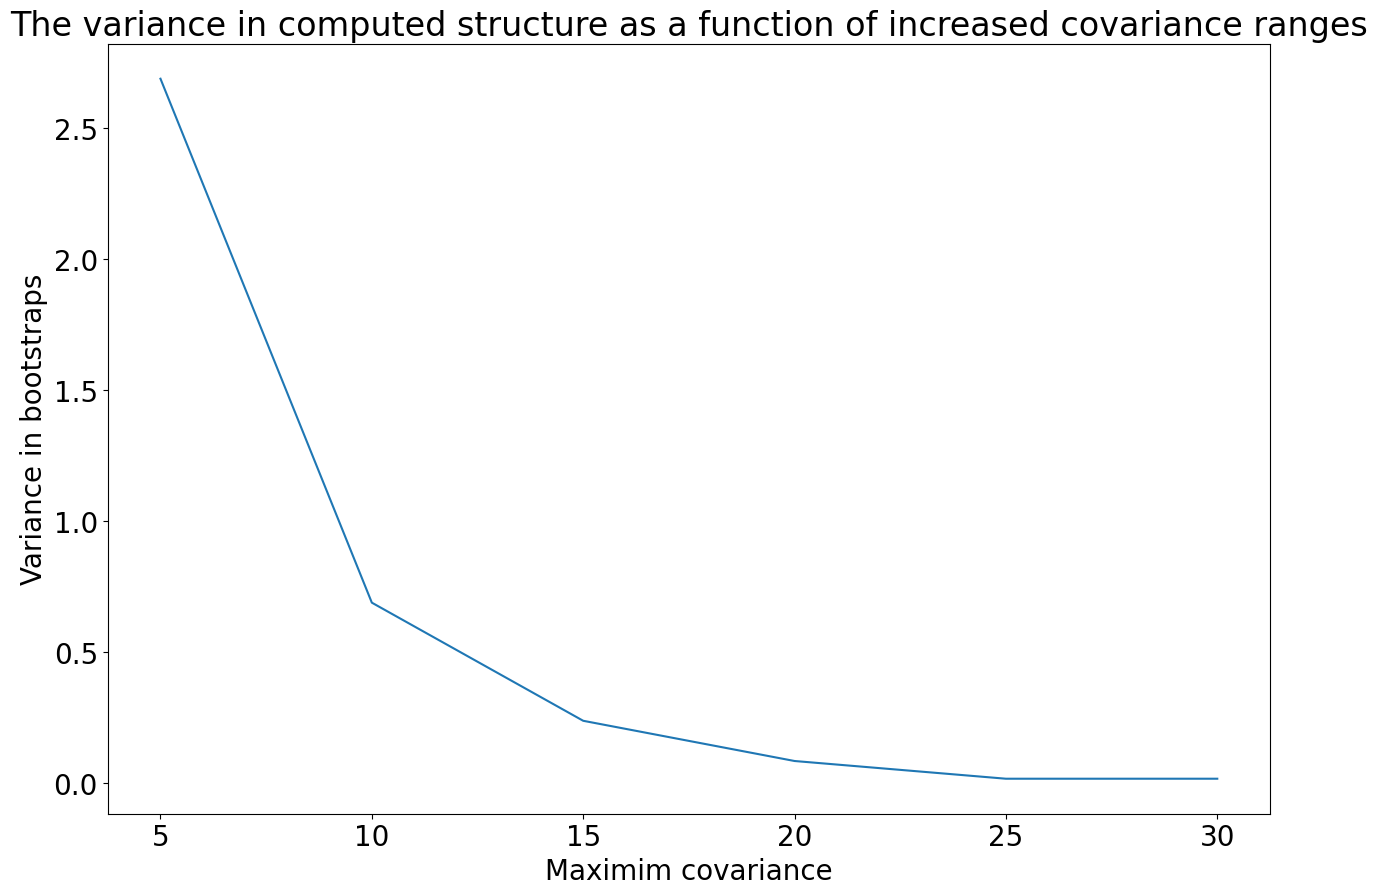

In [196]:
fig = plt.figure(dpi = 300)
plt.style.use("default")
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 20}) 


tag = "Time stamp"
plt.plot([5,10,15,20,25,30],[b for a,b in structure], label = "Time in seconds")
#plt.plot(df["Numper of points per gaussian"],df["Structure_index"], label = "Structure index")
plt.xlabel("Maximim covariance")
plt.ylabel("Variance in bootstraps")
plt.title("The variance in computed structure as a function of increased covariance ranges")
plt.show()

In [ ]:
title = "Parameters of the Gaussians are: dimensions = 2 mean_range = (0 -100) cov_range = (-10 -  10) num_samples = 10 "
df